## Random Forest Classification

## Importing libraries

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing the Dataset

In [3]:
dataset=pd.read_csv("Social_Network_Ads.csv")
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Spliting the Dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
print(X_test)
print(y_test)

[[    35 108000]
 [    52  21000]
 [    47 107000]
 [    46  59000]
 [    46 117000]
 [    28  59000]
 [    45  79000]
 [    28  32000]
 [    53  82000]
 [    35  79000]
 [    31  66000]
 [    46  88000]
 [    35  88000]
 [    20  74000]
 [    37  78000]
 [    54  26000]
 [    20  49000]
 [    47  34000]
 [    37  52000]
 [    28  55000]
 [    41  72000]
 [    22  55000]
 [    38  61000]
 [    31  89000]
 [    26  15000]
 [    41  87000]
 [    28  37000]
 [    49 141000]
 [    48  35000]
 [    39  73000]
 [    37  75000]
 [    47  49000]
 [    42  80000]
 [    18  68000]
 [    35  22000]
 [    28  59000]
 [    30  62000]
 [    39  59000]
 [    46  79000]
 [    35  23000]
 [    52 114000]
 [    49  28000]
 [    58  95000]
 [    32 117000]
 [    59 143000]
 [    59 130000]
 [    42  70000]
 [    34  43000]
 [    41  72000]
 [    35  47000]
 [    40  59000]
 [    53  34000]
 [    47  23000]
 [    28  87000]
 [    35  97000]
 [    21  88000]
 [    37  80000]
 [    32 135000]
 [    40  7100

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Training the Model on Training set

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predicting a Single Result

In [12]:
classifier.predict(sc.transform([[35,10800]]))

array([0])

## Predicitng the Test Result

In [13]:
y_pred=classifier.predict(X_test)

## Compairing the Predicted Result

In [14]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]]


## Making a Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_pred,y_test))

[[56  4]
 [ 6 34]]
0.9


## Visualing the Training Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


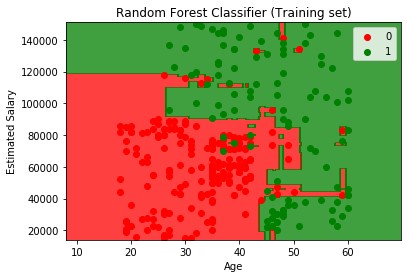

In [17]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')The 
plt.legend()
plt.show()

## Visualing the Test Set Results

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


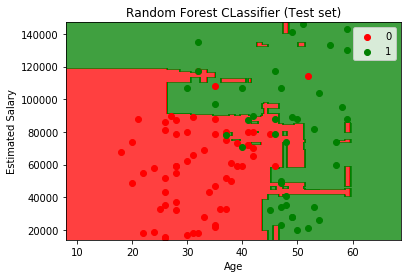

In [18]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest CLassifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()